# PROBLEM STATEMENT
Exercise 2: Download your emails from 1.1.2020 to 1.9.2020. Each recipient and sender is a node. Create adirected, weighted edge from the sender to the recipient. The weight of the edge is the number of emails exchanged. 

(a) Compute weighted in-degree and out-degree of each node. Plot the degree distribution and note your observations. 

(b) Consider the network as an undirected and unweighted network. Plot the degree distribution and note your observations. 

(c) Find the average path length and clustering coefficient of the network version II.

# Importing Mails from mailbox

In [1]:
from email.utils import getaddresses, parseaddr
import mailbox
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx

gmail_mbox = mailbox.mbox("Inbox.mbox")  # parse unix mailbox
df = pd.DataFrame()
all_recipients = []
recipients = []
source = []
src_filtered = []


for msg in gmail_mbox:  
    if (("2019" in str(msg['Date'])) or ("Sep" in str(msg['Date']))):        # Filtering all 2019 mails and all Sep mails (Sep-2020 excluded)
        continue
    else:
        (source_name, source_addr) = parseaddr(msg["From"])  # sender
        tos = msg.get_all("to", [])            
        all_recipients = getaddresses(tos)
        recipients += all_recipients
        for i in range(len(all_recipients)):    # add sender name in case sender email address not descriptive 
            if(("no-reply" in source_addr or "drive" in source_addr or "noreply" in source_addr or "donotreply" in source_addr) and source_name!=''):
                source.append (source_name)
                src_filtered.append(source_addr)
            else:
                source.append(source_addr)
                src_filtered.append(source_name)

df['Sender'] = source
df['Reciever'] = recipients
df


,Sender,Reciever
0,expertspeak@techgig.com,"(, ashwani.mcs19.du@gmail.com)"
1,noreply@atinnaterabbit.eu,"(, ashwani.mcs19.du@gmail.com)"
2,technews@techgig.com,"(, ashwani.mcs19.du@gmail.com)"
3,noreply@medium.com,"(, ashwani.mcs19.du@gmail.com)"
4,noreply@medium.com,"(, ashwani.mcs19.du@gmail.com)"
...,...,...
1568,noreply@panebt.com,"(, ashwani.mcs19.du@gmail.com)"
1569,ducs.events.2020@gmail.com,"(, mcs19du@googlegroups.com)"
1570,ducs.events.2020@gmail.com,"(, ducs_mca19@googlegroups.com)"
1571,ducs.placement.2021@gmail.com,"(, mca18du@googlegroups.com)"


# Cleaning data

In [7]:
r=[]
Inbox = pd.DataFrame(columns= ['Sender','Recipient'])
for i in range(0,len(df)):                     
    r1, r2 = df['Reciever'][i]  # r1 is the recepient name and r2 is the address.                   
    r.append(r2)                                  
    
for i in range(0,len(r)):                         
    r[i]=str(r[i]).split('@gmail.com')[0]
Inbox['Recipient'] = r

for i in range(0,len(source)):
    source[i]=str(source[i]).split('@gmail.com')[0]

Inbox['Sender'] = source
Inbox

,Sender,Recipient
0,expertspeak@techgig.com,ashwani.mcs19.du
1,noreply@atinnaterabbit.eu,ashwani.mcs19.du
2,technews@techgig.com,ashwani.mcs19.du
3,noreply@medium.com,ashwani.mcs19.du
4,noreply@medium.com,ashwani.mcs19.du
...,...,...
1568,noreply@panebt.com,ashwani.mcs19.du
1569,ducs.events.2020,mcs19du@googlegroups.com
1570,ducs.events.2020,ducs_mca19@googlegroups.com
1571,ducs.placement.2021,mca18du@googlegroups.com


# Filter mailbox containing sender or receiver as ashwani.mcs19.du 

In [9]:
filt=Inbox.loc[((Inbox['Sender']=='ashwani.mcs19.du') | (Inbox['Recipient']=='ashwani.mcs19.du')) & (Inbox['Recipient'] != Inbox['Sender'])]

c=filt.groupby(["Sender","Recipient"]).size()

res=pd.DataFrame(c).reset_index()
res2=res.rename(columns={0 : 'weight'},inplace=False)
print(len(res2))
res2

138


,Sender,Recipient,weight
0,1916035@pg.du.ac.in,ashwani.mcs19.du,1
1,aashish.mcs19.du,ashwani.mcs19.du,2
2,aditi.mcs19.du,ashwani.mcs19.du,2
3,akshitavarshney33,ashwani.mcs19.du,2
4,akulbharti.mcs19.du,ashwani.mcs19.du,1
...,...,...,...
133,technews@techgig.com,ashwani.mcs19.du,64
134,user@techgig.com,ashwani.mcs19.du,1
135,vb.ducs,ashwani.mcs19.du,88
136,yatin.mcs19.du,ashwani.mcs19.du,28


# Sorting mails in descending order of their weight
### where sender is ashwani.mcs19.du@gmail.com

In [11]:
mail_sender_only = pd.DataFrame(columns= ['Sender','Recipient'])
mail_sender_only = res2[res2['Sender']=='ashwani.mcs19.du']
print(len(mail_sender_only))
sort= mail_sender_only.sort_values('weight',ascending=False)
sort.head(10)

38


,Sender,Recipient,weight
22,ashwani.mcs19.du,mcs19du@googlegroups.com,94
24,ashwani.mcs19.du,ml-announcements@googlegroups.com,43
44,ashwani.mcs19.du,vb.ducs,28
37,ashwani.mcs19.du,sapna.varsh,25
42,ashwani.mcs19.du,supriyakatyal16,16
12,ashwani.mcs19.du,ashwanivarshney25,12
45,ashwani.mcs19.du,yatin.mcs19.du,11
25,ashwani.mcs19.du,ngupta.cs.du,7
31,ashwani.mcs19.du,rajni.mcs17.du,6
15,ashwani.mcs19.du,farheen.mcs19.du,6


# Sorting mail in descending order of their weight 
### where receiver is ashwani.mcs19.du@gmail.com

In [12]:
mail_rcvr_only = pd.DataFrame(columns= ['Sender','Recipient'])
mail_rcvr_only = res2[res2['Recipient']=='ashwani.mcs19.du']
print(len(mail_rcvr_only))
sort= mail_rcvr_only.sort_values('weight',ascending=False)
sort.head(10)

100


,Sender,Recipient,weight
135,vb.ducs,ashwani.mcs19.du,88
133,technews@techgig.com,ashwani.mcs19.du,64
114,promotion@techgig.com,ashwani.mcs19.du,34
64,jobs@techgig.com,ashwani.mcs19.du,29
136,yatin.mcs19.du,ashwani.mcs19.du,28
102,noreply@medium.com,ashwani.mcs19.du,17
57,expertspeak@techgig.com,ashwani.mcs19.du,17
124,shashi.cs.du,ashwani.mcs19.du,14
85,no-reply@accounts.google.com,ashwani.mcs19.du,10
46,ashwanivarshney25,ashwani.mcs19.du,10


# Creating the graph 

In [13]:
import networkx as nx
G=nx.MultiDiGraph(data = res2)

edge_tuples = res2.to_records(index=False)    # to add weights to directed graph
print(len(edge_tuples))
G.add_weighted_edges_from(edge_tuples)

print(nx.is_weighted(G))
#G.edges(data=True)

138
True


# Adding labels(weights) to the edges

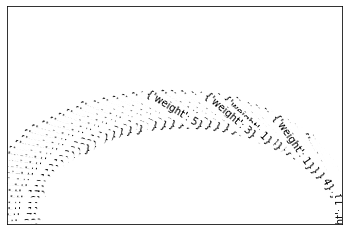

In [19]:
import matplotlib.pyplot as plt
pos = nx.circular_layout(G)

edgelabel = nx.draw_networkx_edge_labels(G, pos)

keys = []
for k in edgelabel.keys():
    keys.append(k)
nodelabels = dict(zip(keys, res2['weight']))

# Plotting the actual graph

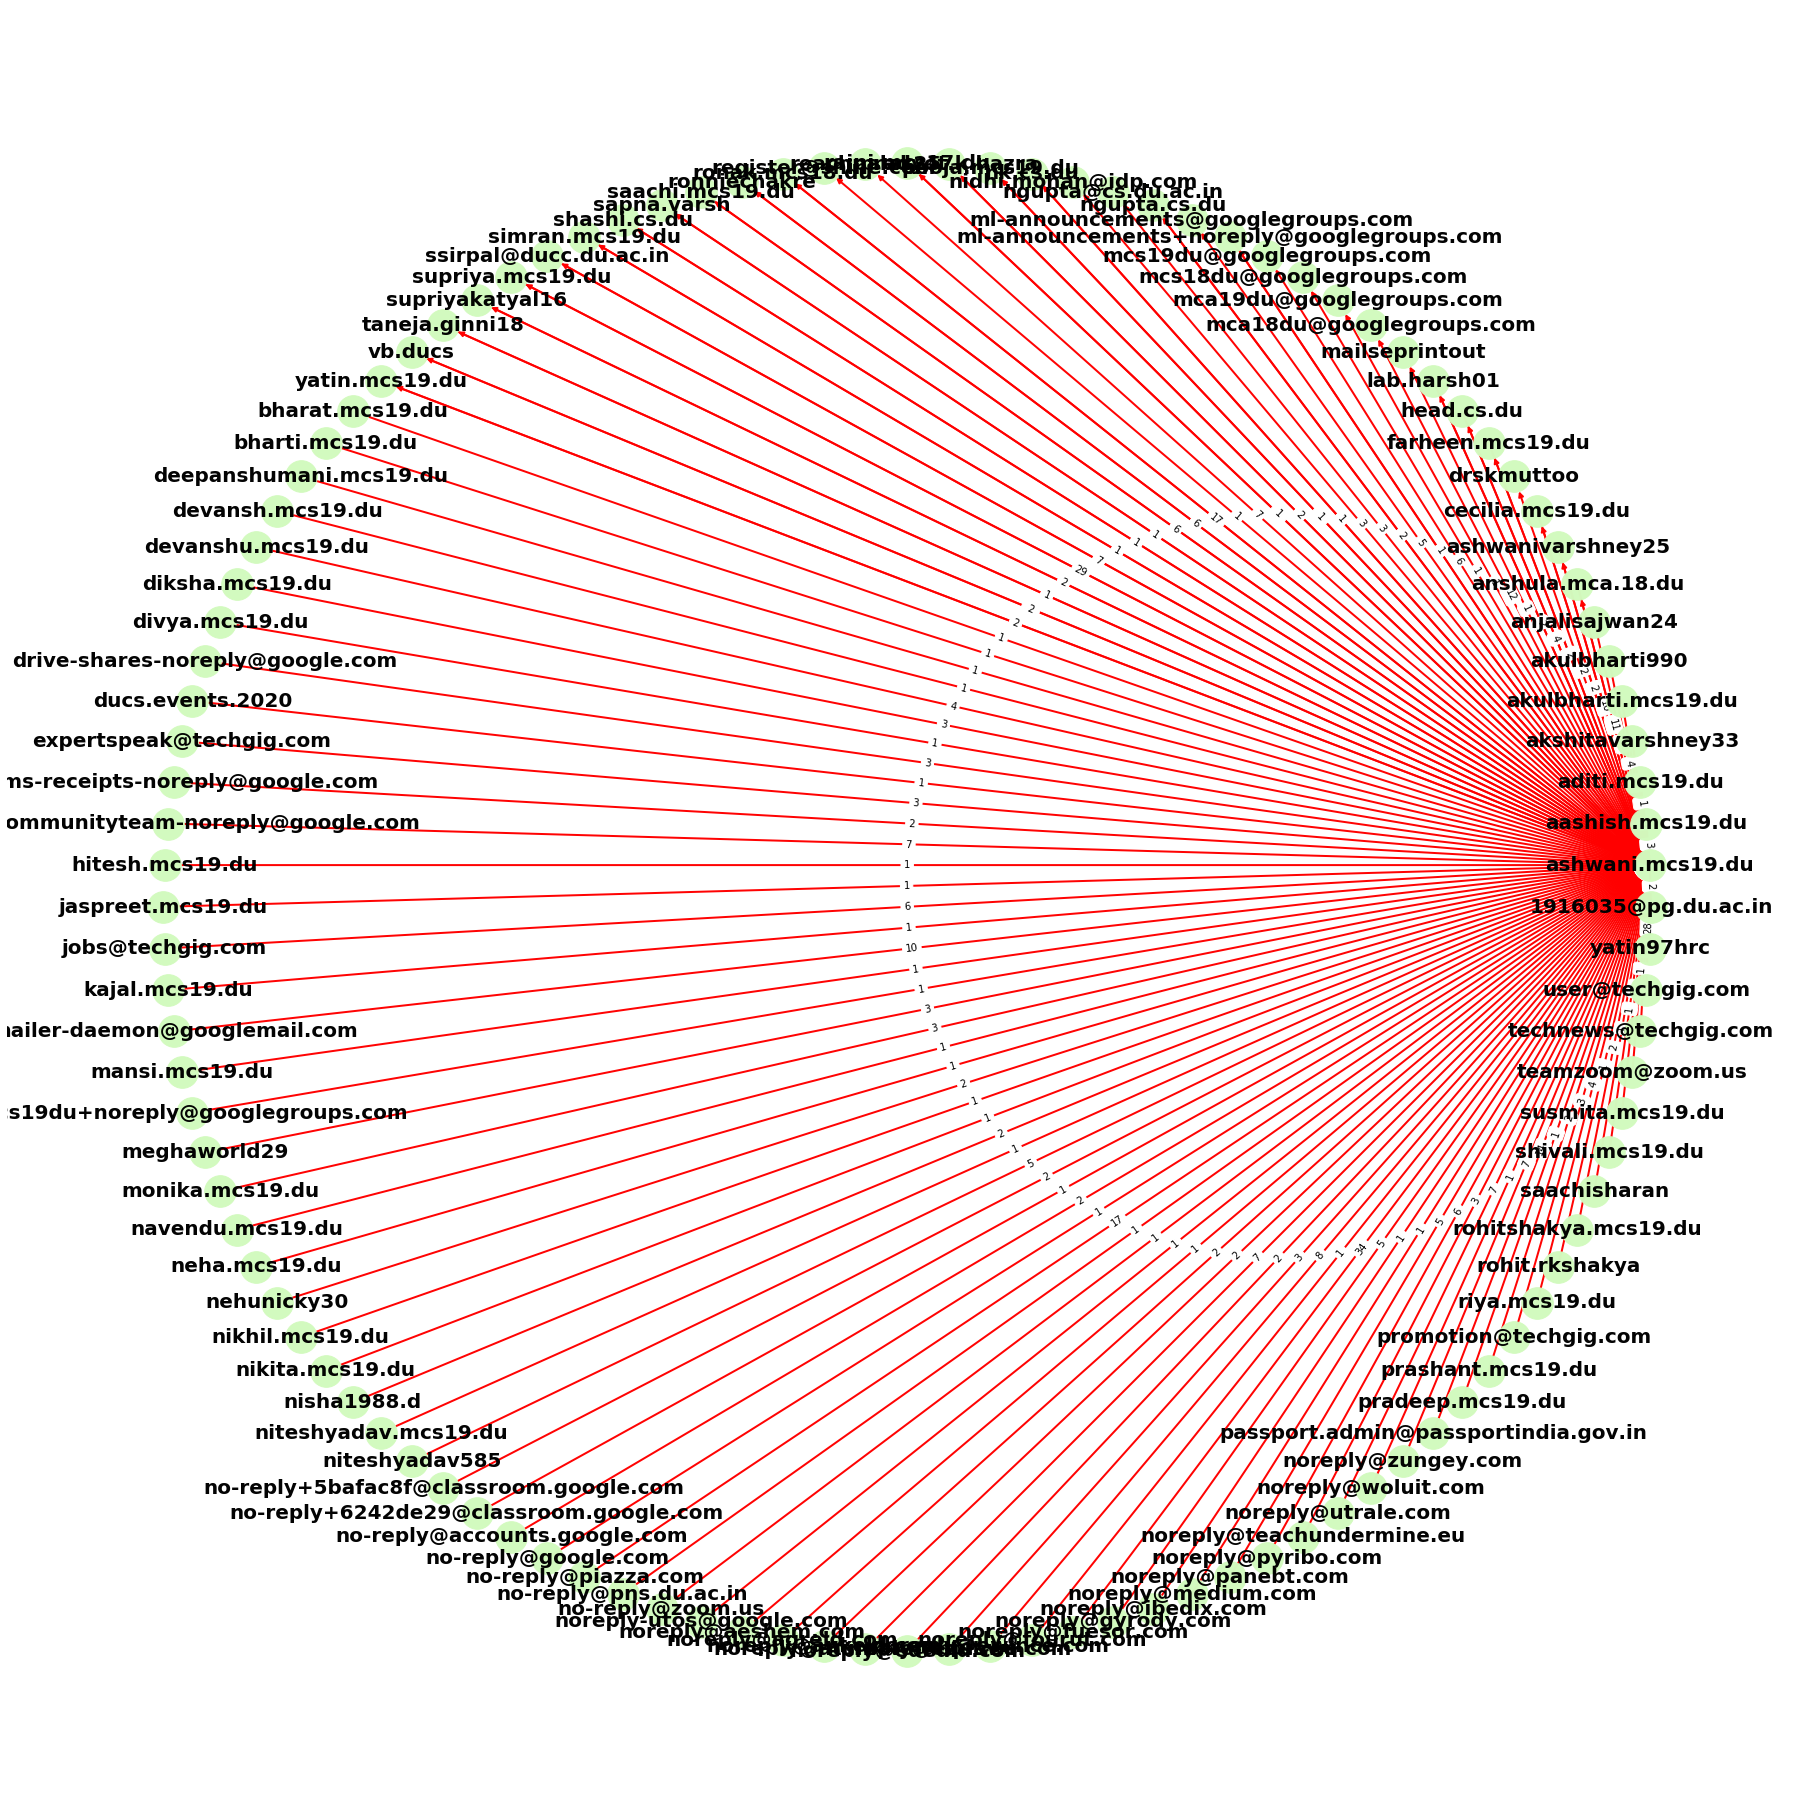

In [21]:
plt.figure(figsize=(25, 25))
pos = nx.circular_layout(G)
nx.draw(G ,pos, with_labels=True, arrows=True,  node_size=1000,node_color='#d2fabe',node_shape='o',
                  edge_color='red', font_size=20,font_color='black',width = 2,font_weight='bold', alpha=0.99)

nx.draw_networkx_edge_labels(G, pos, edge_labels = nodelabels)
plt.savefig('dir.jpeg')

# Printing the information about the graph

In [23]:
nx.info(G)

'Name: \nType: MultiDiGraph\nNumber of nodes: 112\nNumber of edges: 138\nAverage in degree:   1.2321\nAverage out degree:   1.2321'

### Weighted in-degree

In [24]:
wt_in_deg=[G.in_degree(n, weight='weight') for n in G.nodes()]
print(wt_in_deg)

[5, 517, 1, 1, 0, 0, 0, 0, 1, 12, 1, 1, 6, 3, 5, 1, 3, 3, 3, 94, 1, 43, 7, 1, 1, 2, 5, 6, 6, 1, 1, 2, 1, 1, 25, 4, 3, 4, 1, 16, 4, 28, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Weighted out-degree

In [25]:
wt_out_deg=[G.out_degree(n, weight='weight') for n in G.nodes()]
print(wt_out_deg)

[1, 314, 2, 2, 2, 1, 1, 1, 2, 10, 4, 0, 6, 1, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 2, 8, 5, 0, 0, 6, 3, 7, 7, 14, 2, 3, 4, 1, 1, 88, 28, 2, 2, 2, 1, 2, 1, 1, 2, 1, 17, 6, 1, 1, 7, 29, 2, 2, 2, 1, 1, 1, 4, 3, 1, 1, 3, 2, 7, 1, 6, 1, 10, 1, 1, 3, 3, 1, 1, 2, 1, 1, 2, 1, 5, 2, 1, 2, 1, 17, 1, 1, 1, 1, 2, 2, 7, 3, 1, 34, 1, 1, 5, 1, 1, 2, 1, 64, 1, 1]


# Plotting degree distribution
### For in-degree

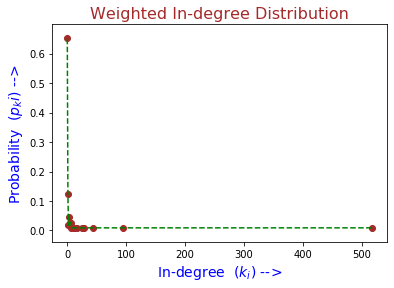

In [26]:
import collections
import numpy as np
in_deg_seq=sorted(wt_in_deg, reverse=True) 
degreeCount=collections.Counter(in_deg_seq) #counts the number of nodes having a given degre value
deg, cnt = zip(*degreeCount.items())

pk = np.array(cnt)/112  #calculating the probability of randomly selected node having degree k

plt.scatter(deg,pk,color="brown")
plt.title("Weighted In-degree Distribution", color='Brown',size=16)
plt.xlabel("In-degree  ($k_i$) -->", color='Blue', size=14)
plt.ylabel("Probability  ($p_ki$) -->", color='Blue',size=14)

plt.plot(deg,pk,color='green',linestyle='dashed')    #,label='power-law distribution observed')

plt.savefig('in-deg.JPEG')
plt.show()


### For out-degree

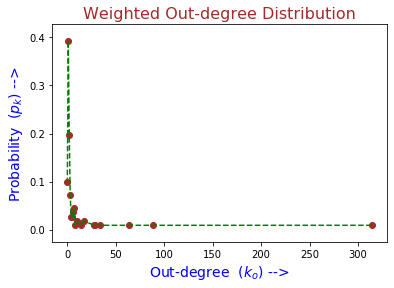

In [27]:
import collections
import numpy as np
out_deg_seq=sorted(wt_out_deg, reverse=True) 
degreeCount=collections.Counter(out_deg_seq) #counts the number of nodes having a given degre value
deg, cnt = zip(*degreeCount.items())

pk = np.array(cnt)/112 #calculating the probability of randomly selected node having degree k

plt.scatter(deg,pk,color="brown")
plt.title("Weighted Out-degree Distribution", color='Brown',size=16)
plt.xlabel("Out-degree  ($k_o$) -->", color='Blue', size=14)
plt.ylabel("Probability  ($p_k$) -->", color='Blue',size=14)

plt.plot(deg,pk,color='green',linestyle='dashed')    #,label='power-law distribution observed')

plt.savefig('out-deg.JPEG')
plt.show()


# Plotting undirected weighted graph (Version II)

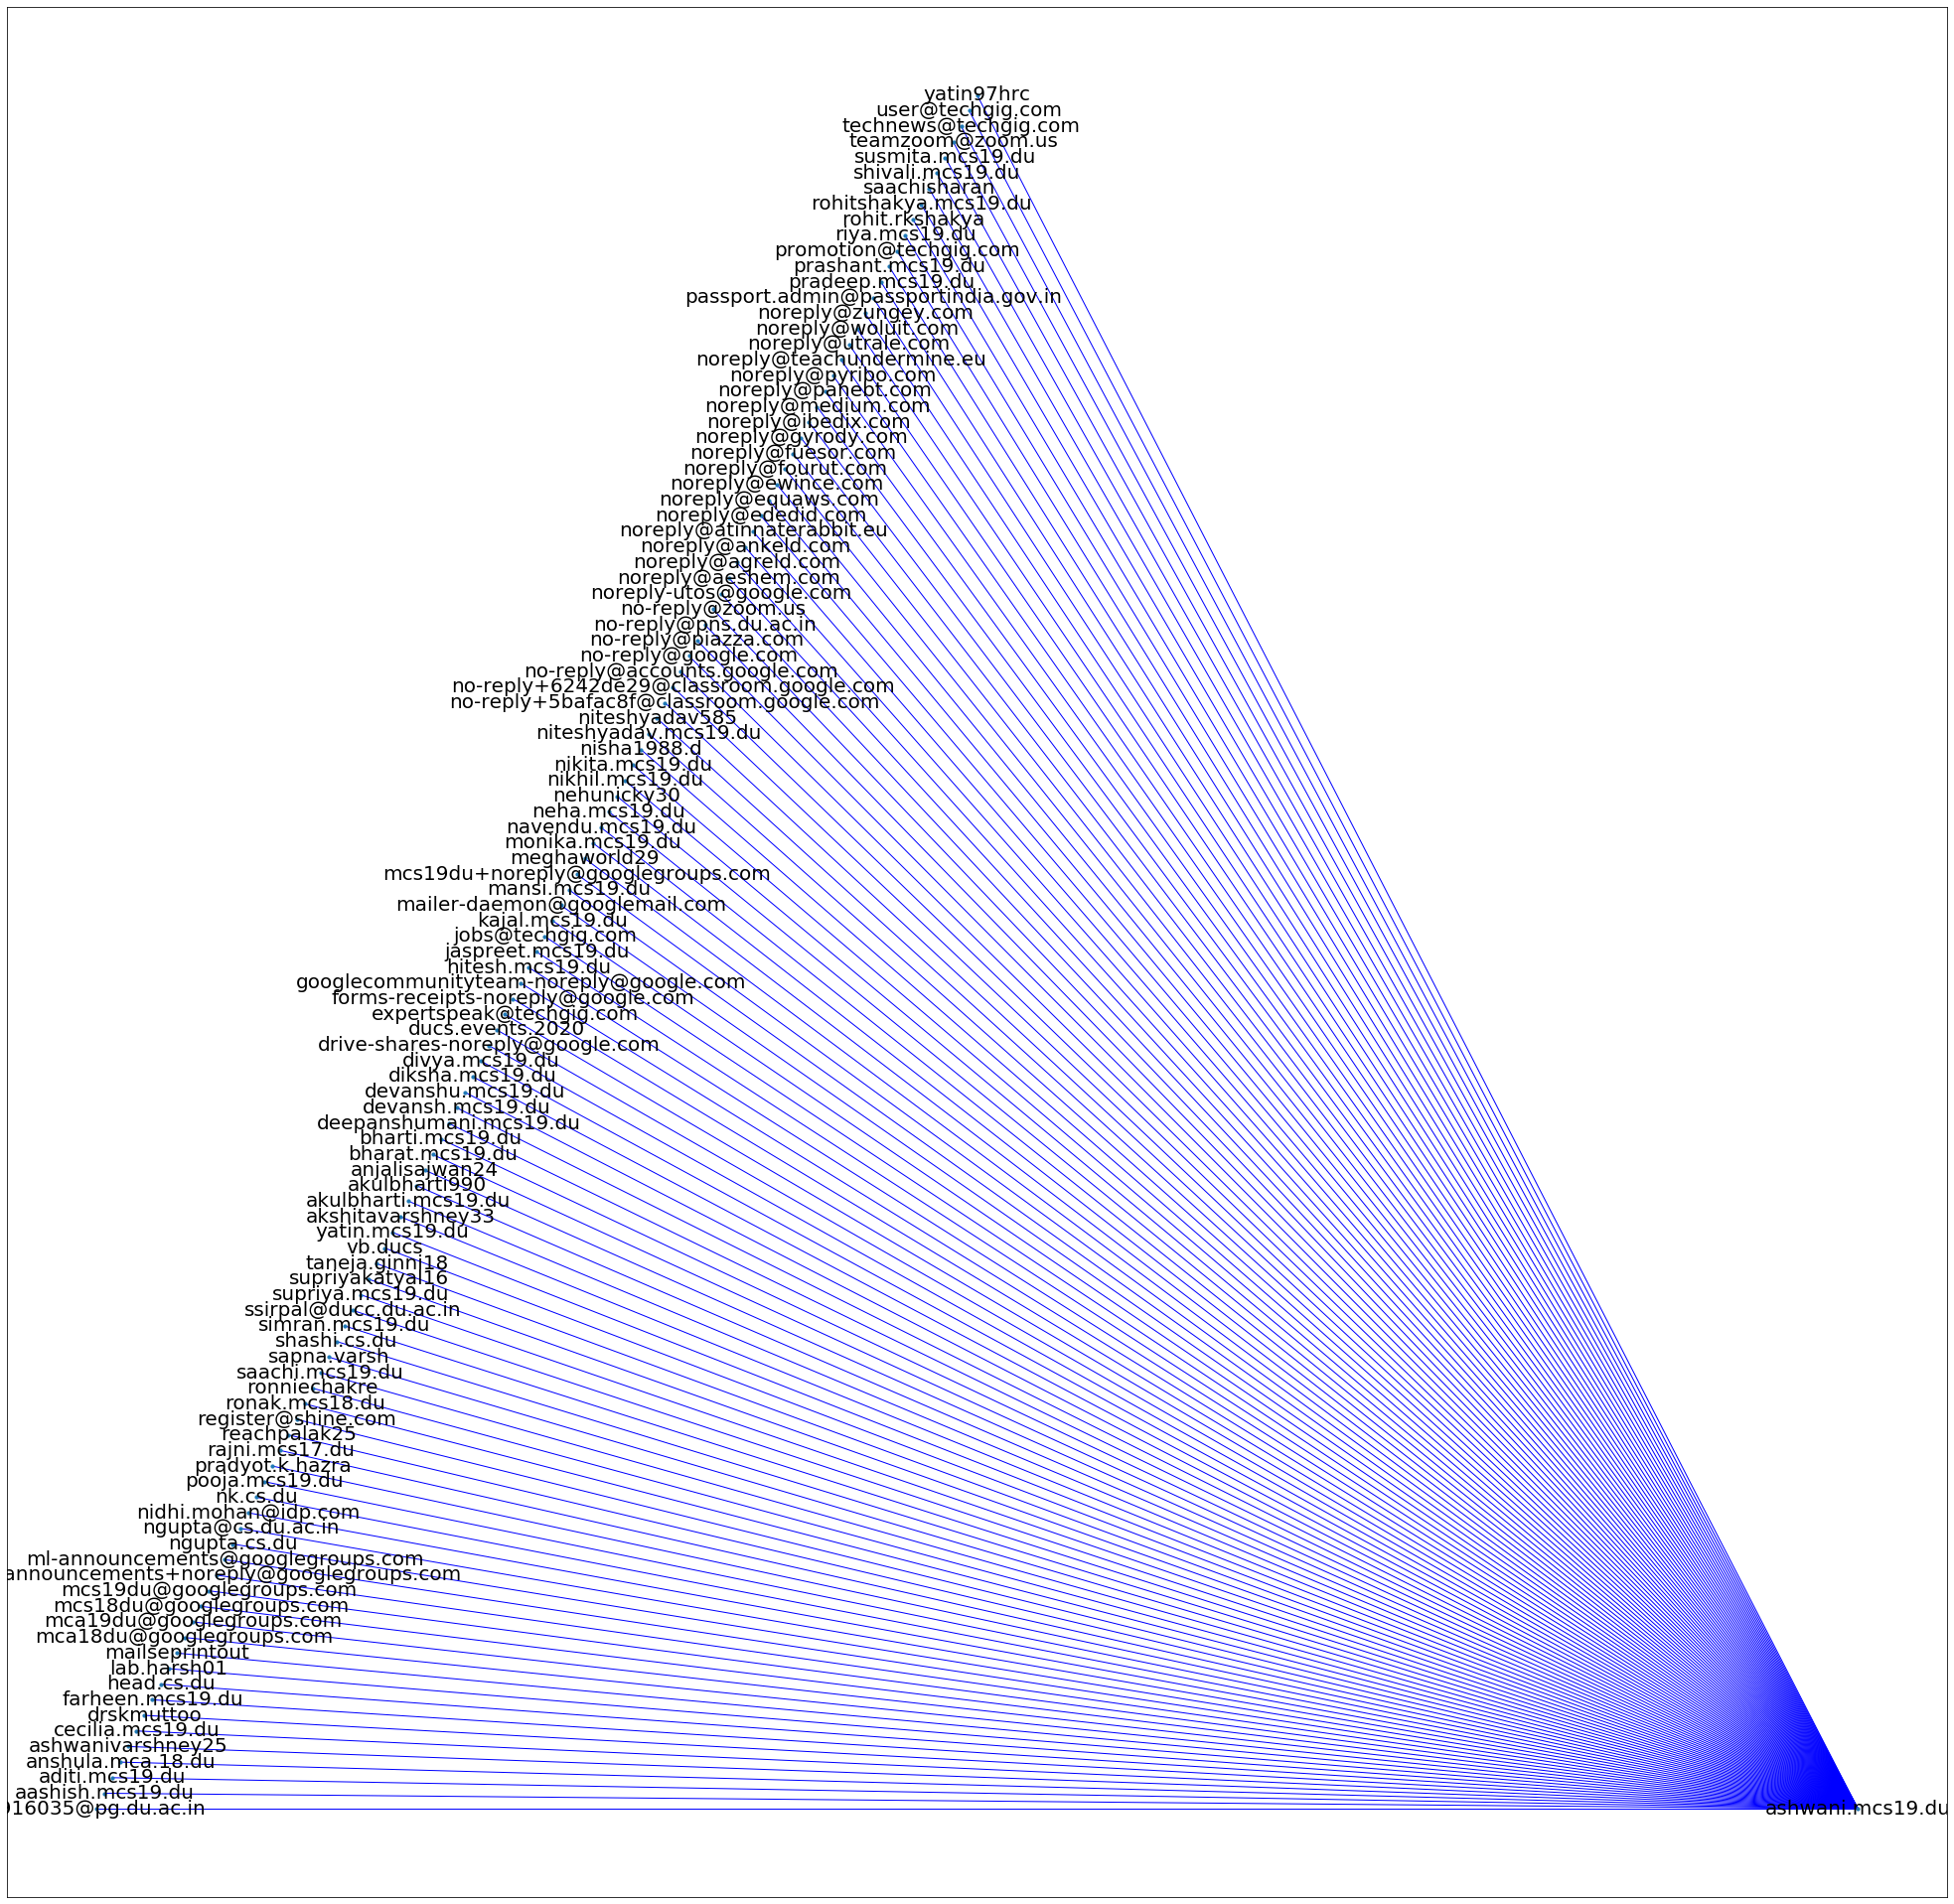

In [28]:
import warnings
warnings.filterwarnings(action='ignore')
GU=nx.Graph(G)       # Converting wedighted directed graph to un-weighted and un-directed
pos = nx.planar_layout(GU)
#pos = nx.spring_layout(GU, iterations=4)
plt.figure(figsize=(35, 35))
nx.draw_networkx(GU,pos,node_size=10, font_size=20, edge_color='blue')

# Calculating degree

In [29]:
ver2_deg=[GU.degree(n) for n in GU.nodes()]
print("\n".join("{} ----------> {}".format(x, y) for x, y in zip(GU.nodes(), ver2_deg)))

1916035@pg.du.ac.in ----------> 1
ashwani.mcs19.du ----------> 111
aashish.mcs19.du ----------> 1
aditi.mcs19.du ----------> 1
akshitavarshney33 ----------> 1
akulbharti.mcs19.du ----------> 1
akulbharti990 ----------> 1
anjalisajwan24 ----------> 1
anshula.mca.18.du ----------> 1
ashwanivarshney25 ----------> 1
cecilia.mcs19.du ----------> 1
drskmuttoo ----------> 1
farheen.mcs19.du ----------> 1
head.cs.du ----------> 1
lab.harsh01 ----------> 1
mailseprintout ----------> 1
mca18du@googlegroups.com ----------> 1
mca19du@googlegroups.com ----------> 1
mcs18du@googlegroups.com ----------> 1
mcs19du@googlegroups.com ----------> 1
ml-announcements+noreply@googlegroups.com ----------> 1
ml-announcements@googlegroups.com ----------> 1
ngupta.cs.du ----------> 1
ngupta@cs.du.ac.in ----------> 1
nidhi.mohan@idp.com ----------> 1
nk.cs.du ----------> 1
pooja.mcs19.du ----------> 1
pradyot.k.hazra ----------> 1
rajni.mcs17.du ----------> 1
reachpalak25 ----------> 1
register@shine.com --------

# Deg distribution for Network Version II

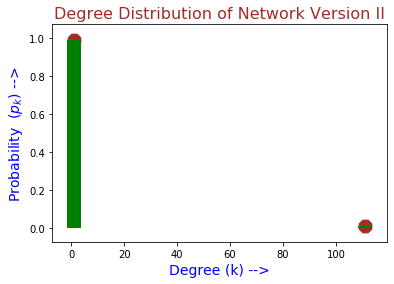

In [30]:
deg_seq=sorted(ver2_deg, reverse=True) 
degreeCount=collections.Counter(deg_seq) #counts the number of nodes having a given degre value
deg, cnt = zip(*degreeCount.items())

pk = np.array(cnt)/112  #calculating the probability of randomly selected node having degree k

plt.bar(deg,pk,width=5,color='green')
plt.scatter(deg,pk,color="brown",s=190,marker='8')
plt.title("Degree Distribution of Network Version II", color='Brown',size=16)
plt.xlabel("Degree (k) -->", color='Blue', size=14)
plt.ylabel("Probability  ($p_k$) -->", color='Blue',size=14)

plt.savefig('deg.JPEG')
plt.show()

# Average path length and clustering coefficient

In [31]:
print('Average Path length of entire Network II ----> ', nx.average_shortest_path_length(GU))
print('Clustering Coeff of entire Network II ----> ',nx.average_clustering(GU))

Average Path length of entire Network II ---->  1.9821428571428572
Clustering Coeff of entire Network II ---->  0.0


# Power law distribution: Scale free property

In [33]:
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings(action='ignore')
from scipy import stats

### Defining the equation

In [34]:
def test(x,alpha,gamma):
    return alpha*(x**(-gamma))                 #Power law equation---- f(k) = alpha * k ^ (-gamma)

### Plotting in-degree distribution network version I (log-log plot)

α_in =  0.11621524064525278  ::::  log(α_in) =  -3.1051288164932935  ::::   |γ_in| =  1.1384841182935646 



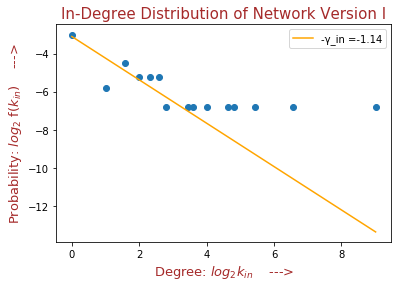

In [37]:
wt_in_deg=[G.in_degree(n, weight='weight') for n in G.nodes()]
in_deg_seq=sorted(wt_in_deg, reverse=True)
degreeCount=collections.Counter(in_deg_seq) #counts the number of nodes having a given degre value
deg_in, cnt = zip(*degreeCount.items())

pk_in = np.array(cnt)/112  #calculating the probability of randomly selected node having degree k

pk_in=pk_in[:-1]      
deg_in=deg_in[:-1]          

param,param_cov = curve_fit(test, np.array(deg_in), pk_in) #To find alpha and gamma values that best fit the network curve

alpha_in, gamma_in = param
print("\u03B1_in = ",alpha_in," :::: ","log(\u03B1_in) = ",np.log2(alpha_in)," :::: "," |\u03B3_in| = ",gamma_in,"\n")

log_pk=np.log2(pk_in)    
log_k = np.log2(deg_in)
log_alpha=np.log2(alpha_in)

lab='-γ_in =' + str(round(-gamma_in,2))   
vals=[-gamma_in*i+log_alpha for i in log_k]   # equation of the line to be fitted
plt.scatter(log_k,log_pk)
plt.plot(log_k,vals,color='orange',label=lab)
plt.legend()
plt.title("In-Degree Distribution of Network Version I", color='Brown',size=15)
plt.xlabel("Degree: $log_2$$k_{in}$    --->", color='brown', size=13)
plt.ylabel("Probability: $log_2$ f($k_{in}$)    --->", color='brown',size=13)
plt.show()

### Plotting out-degree distribution network version I (log-log plot)

α_out =  0.5817495875633062  ::::  log(α_out) =  -0.7815298120682275  ::::  γ_out =  1.378598617491535 



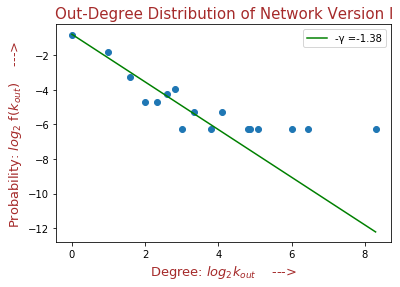

In [39]:
wt_out_deg=[G.out_degree(n, weight='weight') for n in G.nodes()]
out_deg_seq=sorted(wt_out_deg, reverse=True)
degreeCount=collections.Counter(out_deg_seq) #counts the number of nodes having a given degre value

deg_out, cnt = zip(*degreeCount.items())
pk_out = np.array(cnt)/77  #calculating the probability of randomly selected node having degree k

pk_out=pk_out[:-1]                         
deg_out=deg_out[:-1]

param,param_cov = curve_fit(test, np.array(deg_out), pk_out) #To find alpha and gamma values that best fit the network curve

alpha_out, gamma_out = param
print("\u03B1_out = ",alpha_out," :::: ","log(\u03B1_out) = ",np.log2(alpha_out)," :::: ","\u03B3_out = ",gamma_out,"\n")


log_pk=np.log2(pk_out)
log_k = np.log2(deg_out)
log_alpha=np.log2(alpha_out)

lab='-γ =' + str(round(-gamma_out,2))
vals=[-gamma_out*i+log_alpha for i in log_k]
plt.scatter(log_k,log_pk)
plt.plot(log_k,vals,color='g',label=lab)
plt.legend()
plt.title("Out-Degree Distribution of Network Version I", color='Brown',size=15)
plt.xlabel("Degree: $log_2$$k_{out}$    --->", color='brown', size=13)
plt.ylabel("Probability: $log_2$ f($k_{out}$)    --->", color='brown',size=13)
plt.show()

### Plotting degree distribution network version II (log-log plot)


α =  0.9910714285714286 	::::  log(α) =  -0.012939055707498098 	::::  γ =  1.0


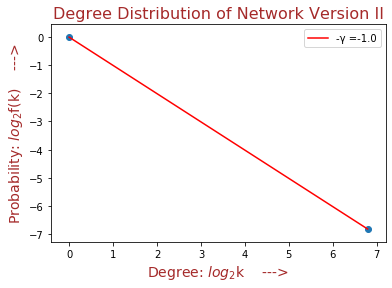

In [42]:
degree_sequence=sorted([d for n,d in GU.degree()], reverse=True) 
#print('Degree sequence ==> ',degree_sequence)
degreeCount=collections.Counter(degree_sequence) #counts the number of nodes having a given degre value
deg, cnt = zip(*degreeCount.items())

avg_degree = np.average(deg)

pk = np.array(cnt)/112  #calculating the probability of randomly selected node having degree k

param,param_cov = curve_fit(test, np.array(deg), pk)         #To find alpha and gamma values that best fit the network curve

alpha, gamma = param
print("\n\u03B1 = ",alpha,"\t:::: ","log(\u03B1) = ",np.log2(alpha),"\t:::: ","\u03B3 = ",gamma,)

log_pk=np.log2(pk)
log_k = np.log2(deg)
log_alpha=np.log2(alpha)

val= [-gamma*i + log_alpha for i in log_k]
lab='-γ =' + str(round(-gamma,2))
plt.plot(log_k,val,color='r',label=lab)
plt.scatter(log_k,log_pk)
plt.legend()
plt.title("Degree Distribution of Network Version II", color='Brown',size=16)
plt.xlabel("Degree: $log_2$k    --->", color='brown', size=14)
plt.ylabel("Probability: $log_2$f(k)    --->", color='brown',size=14)
#plt.rc('legend', fontsize=100)
plt.show()

#print(np.polyfit(log_k,log_pk,1))

# Completed !!